### Decision tree classifier

In [1]:
# installation of required libraries
!pip install seaborn
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt


In [15]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df_new = pd.read_csv(url)
df_new.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
# Step 2: Separating the training set and test set
x = df.drop("species", axis=1)  # Features
y = df["species"]  # Target

In [18]:

# Splitting dataset into training, validation, and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
x_train2, x_validation, y_train2, y_validation = train_test_split(x_train, y_train, test_size=0.30)

In [19]:
# applying decision tree with entropy
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='entropy',max_depth=3)
dtree.fit(x_train2,y_train2)
predictions = dtree.predict(x_validation)
predictions2 = dtree.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(y_validation,predictions)
accuracy_score(y_test,predictions2)

0.9555555555555556

In [23]:
# decision tree with gini index

dtree2 = DecisionTreeClassifier(criterion='gini',max_depth=3)
dtree2.fit(x_train2,y_train2)
predictions = dtree2.predict(x_validation)
predictions2 = dtree2.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(y_validation,predictions)
accuracy_score(y_test,predictions2)

0.9555555555555556

In [26]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

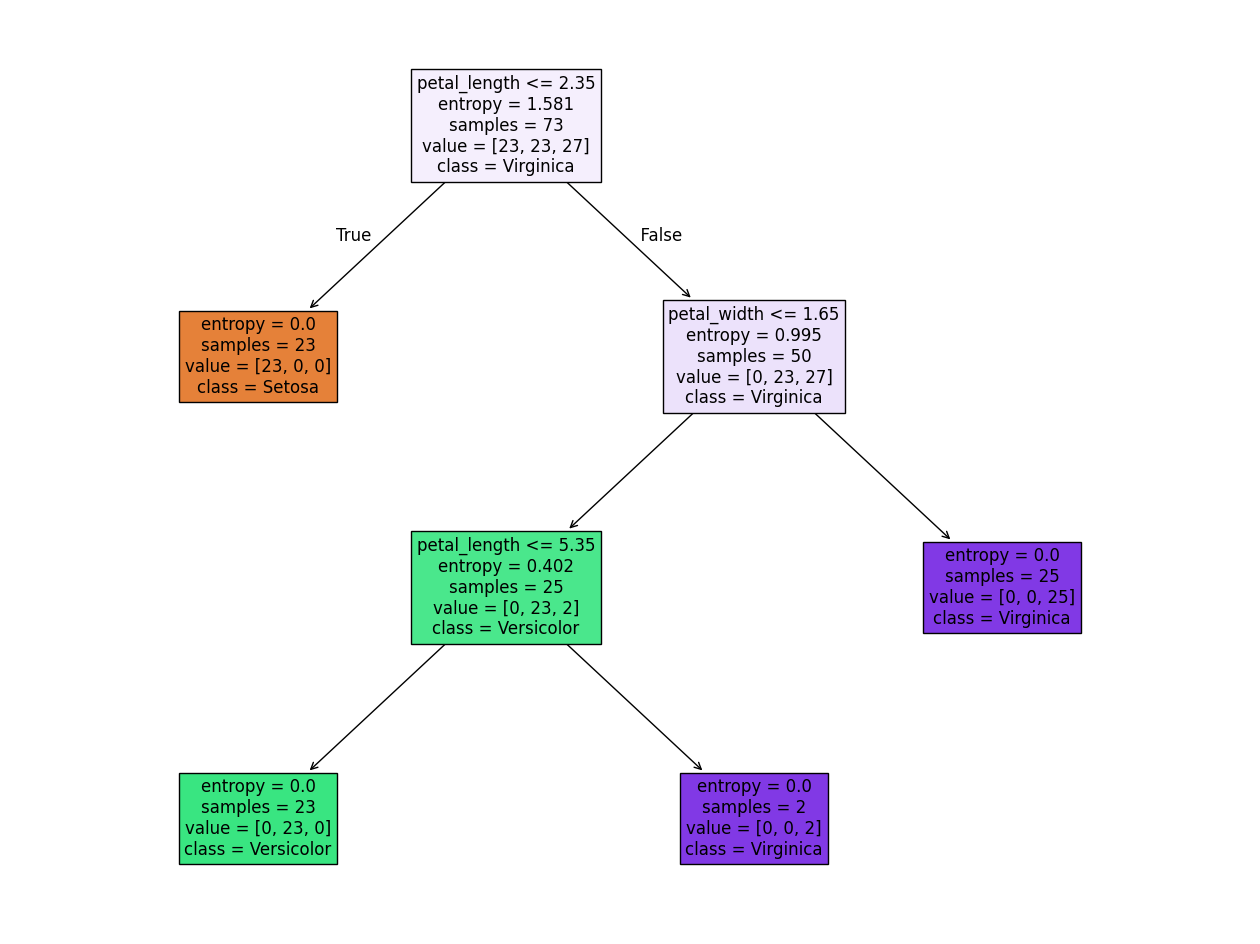

In [28]:
fig = plt.figure(figsize=(16,12))
a = plot_tree(dtree,feature_names=df.columns,fontsize=12,filled=True,class_names=['Setosa','Versicolor','Virginica'])

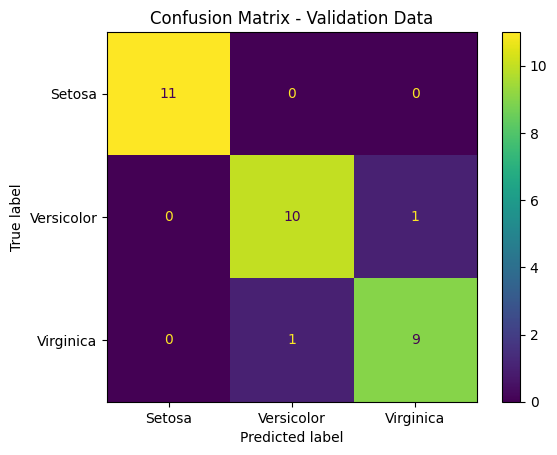

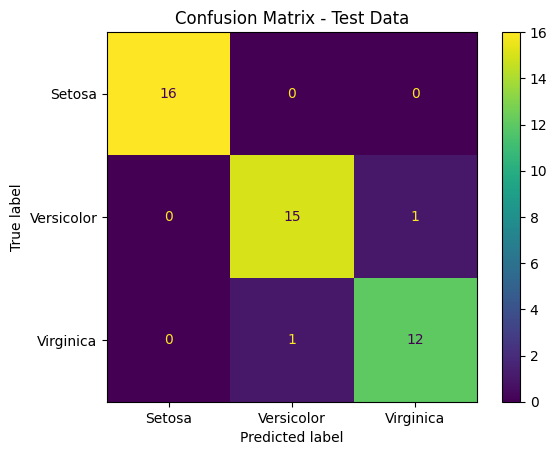

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix for validation predictions
cm_validation = confusion_matrix(y_validation, predictions)
disp_validation = ConfusionMatrixDisplay(confusion_matrix=cm_validation, display_labels=['Setosa', 'Versicolor', 'Virginica'])
disp_validation.plot()
plt.title("Confusion Matrix - Validation Data")
plt.show()

# Confusion matrix for test predictions
cm_test = confusion_matrix(y_test, predictions2)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Setosa', 'Versicolor', 'Virginica'])
disp_test.plot()
plt.title("Confusion Matrix - Test Data")
plt.show()


C:\Users\omkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\omkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\omkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


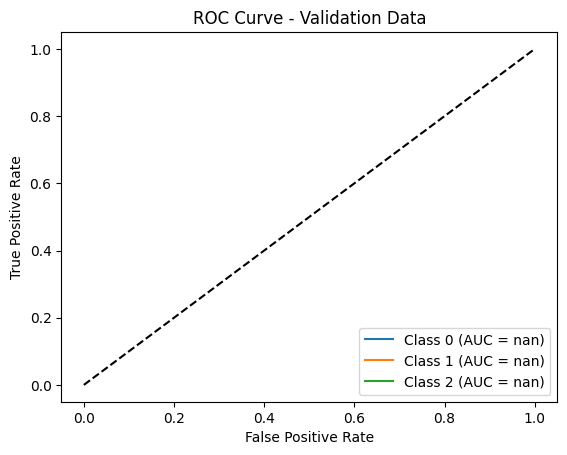

In [30]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output for multiclass ROC
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Replace with appropriate class labels
y_validation_binarized = label_binarize(y_validation, classes=[0, 1, 2])

# Predict probabilities for validation and test data
y_val_probs = dtree.predict_proba(x_validation)
y_test_probs = dtree.predict_proba(x_test)

# Plot ROC curves
for i in range(3):  # Assuming 3 classes
    fpr, tpr, _ = roc_curve(y_validation_binarized[:, i], y_val_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Validation Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


In [31]:
from sklearn.metrics import classification_report

# Validation data metrics
print("Validation Data Metrics:")
print(classification_report(y_validation, predictions, target_names=['Setosa', 'Versicolor', 'Virginica']))

# Test data metrics
print("Test Data Metrics:")
print(classification_report(y_test, predictions2, target_names=['Setosa', 'Versicolor', 'Virginica']))


Validation Data Metrics:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       0.91      0.91      0.91        11
   Virginica       0.90      0.90      0.90        10

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.94      0.94      0.94        32

Test Data Metrics:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        16
  Versicolor       0.94      0.94      0.94        16
   Virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

